# Online Shoppers Purchasing Intention
[Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)

__Data Dictionary__

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")

In [3]:
df.shape

(12330, 18)

In [4]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [7]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
df.describe(include='O').T

,count,unique,top,freq
Month,12330,10,May,3364
VisitorType,12330,3,Returning_Visitor,10551


In [9]:
# Categorical Columns
cat_columns = [col for col in df.columns if df[col].nunique() < 30]

In [10]:
# Check for Null Values
df.isnull().sum().sum()

0

In [11]:
# Check for duplicates
df.duplicated().sum()

125

In [12]:
# Check Conversion Rate (Revenue) for duplicate entries
df[df.duplicated()]['Revenue'].value_counts()

False    125
Name: Revenue, dtype: int64

In [13]:
# Given Conversion Rate For the Year
df['Revenue'].value_counts(normalize=True)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

In [14]:
import pandas_profiling as pp

In [15]:
report = pp.ProfileReport(df)
report.to_file("PPReport.html")

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df['Weekend'] = df['Weekend'].map({False:0, True:1})
df['Revenue'] = df['Revenue'].map({False:0, True:1})

### Univariate Analysis

0    0.843671
1    0.156329
Name: Revenue, dtype: float64


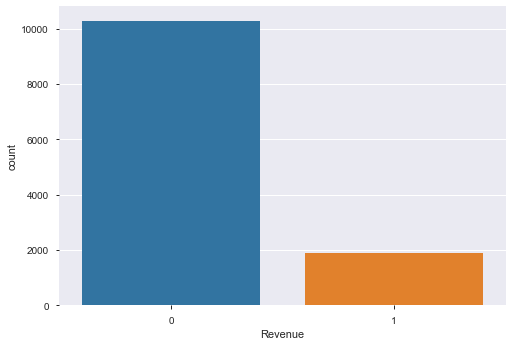

In [18]:
print(df['Revenue'].value_counts(normalize=True))
sns.countplot(df['Revenue'])
plt.show()

The baseline revenue generation through Online Shoppers for the given year is **15.63%**.  

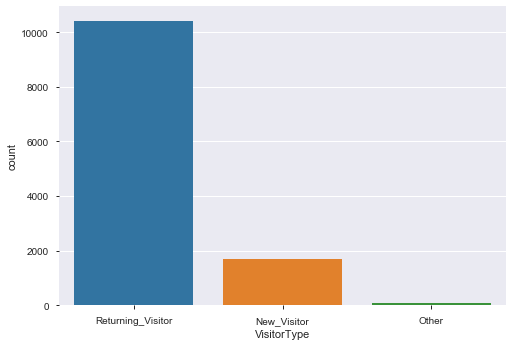

In [19]:
sns.countplot(df['VisitorType']);

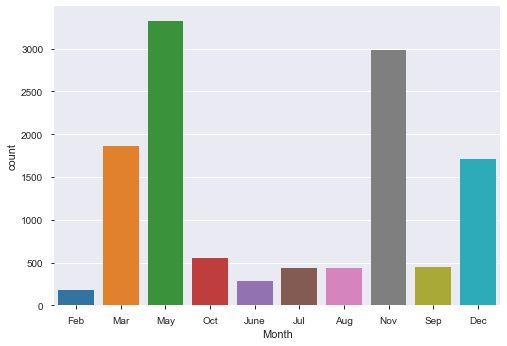

In [20]:
sns.countplot(df['Month']);

In [21]:
num_cols = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 
               'ExitRates', 'PageValues']

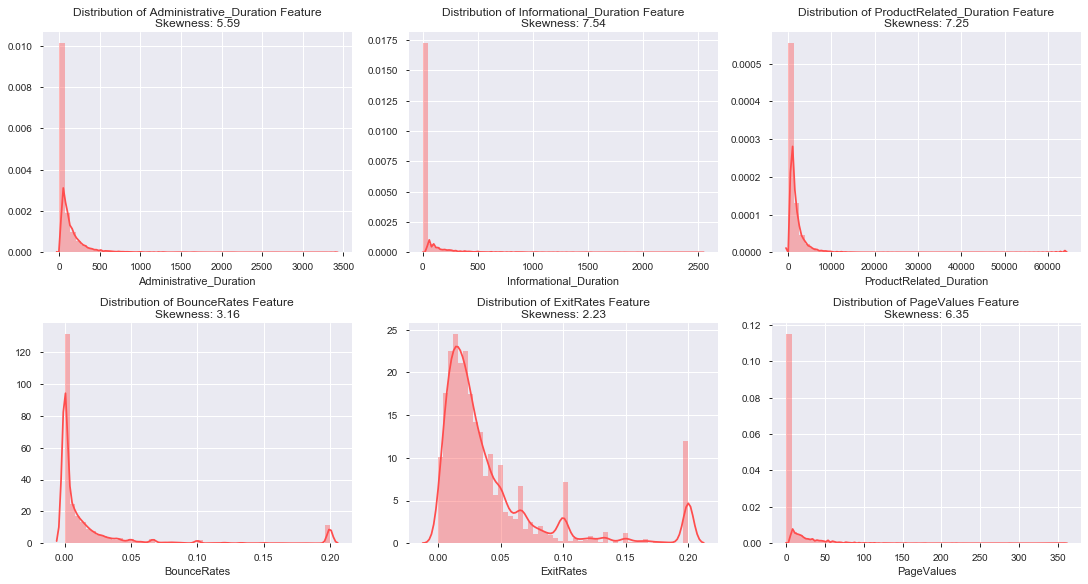

In [22]:
figs, axes = plt.subplots(2,3, figsize=(15,8), constrained_layout=True)
for col, ax in zip(num_cols, axes.flat):
    sns.distplot(df[col], ax=ax, color='#ff4d4d')
    ax.set_title("Distribution of {} Feature\nSkewness: {}".format(col, round(df[col].skew(),2)))
plt.show()

In [23]:
cat_cols = ['Administrative', 'Informational', 'ProductRelated', 'SpecialDay', 'OperatingSystems', 'Browser', 
            'Region', 'TrafficType', 'Weekend']

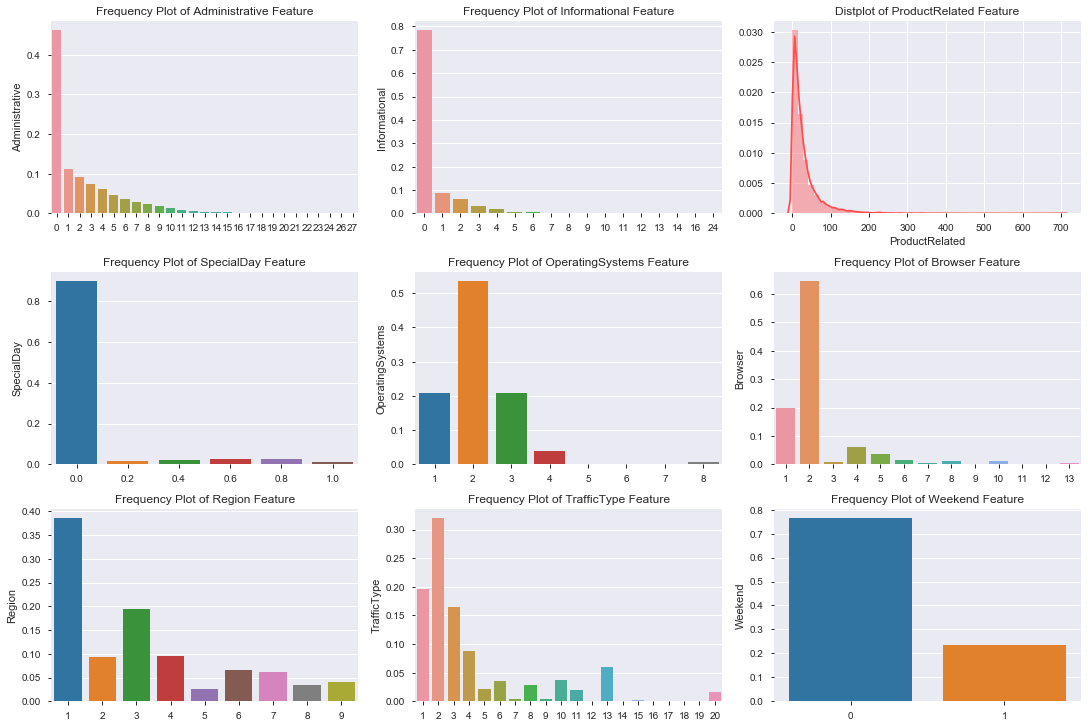

In [24]:
figs, axes = plt.subplots(3,3, figsize=(15,10), constrained_layout=True)
for col, ax in zip(cat_cols, axes.flat):
    if col == 'ProductRelated':
        sns.distplot(df[col], ax=ax, color='#ff4d4d')
        ax.set_title("Distplot of {} Feature".format(col))
    else:
        sns.barplot(df[col].value_counts(normalize=True).index, df[col].value_counts(normalize=True), ax=ax)
        ax.set_title("Frequency Plot of {} Feature".format(col))
plt.show()

### Bivariate Analysis

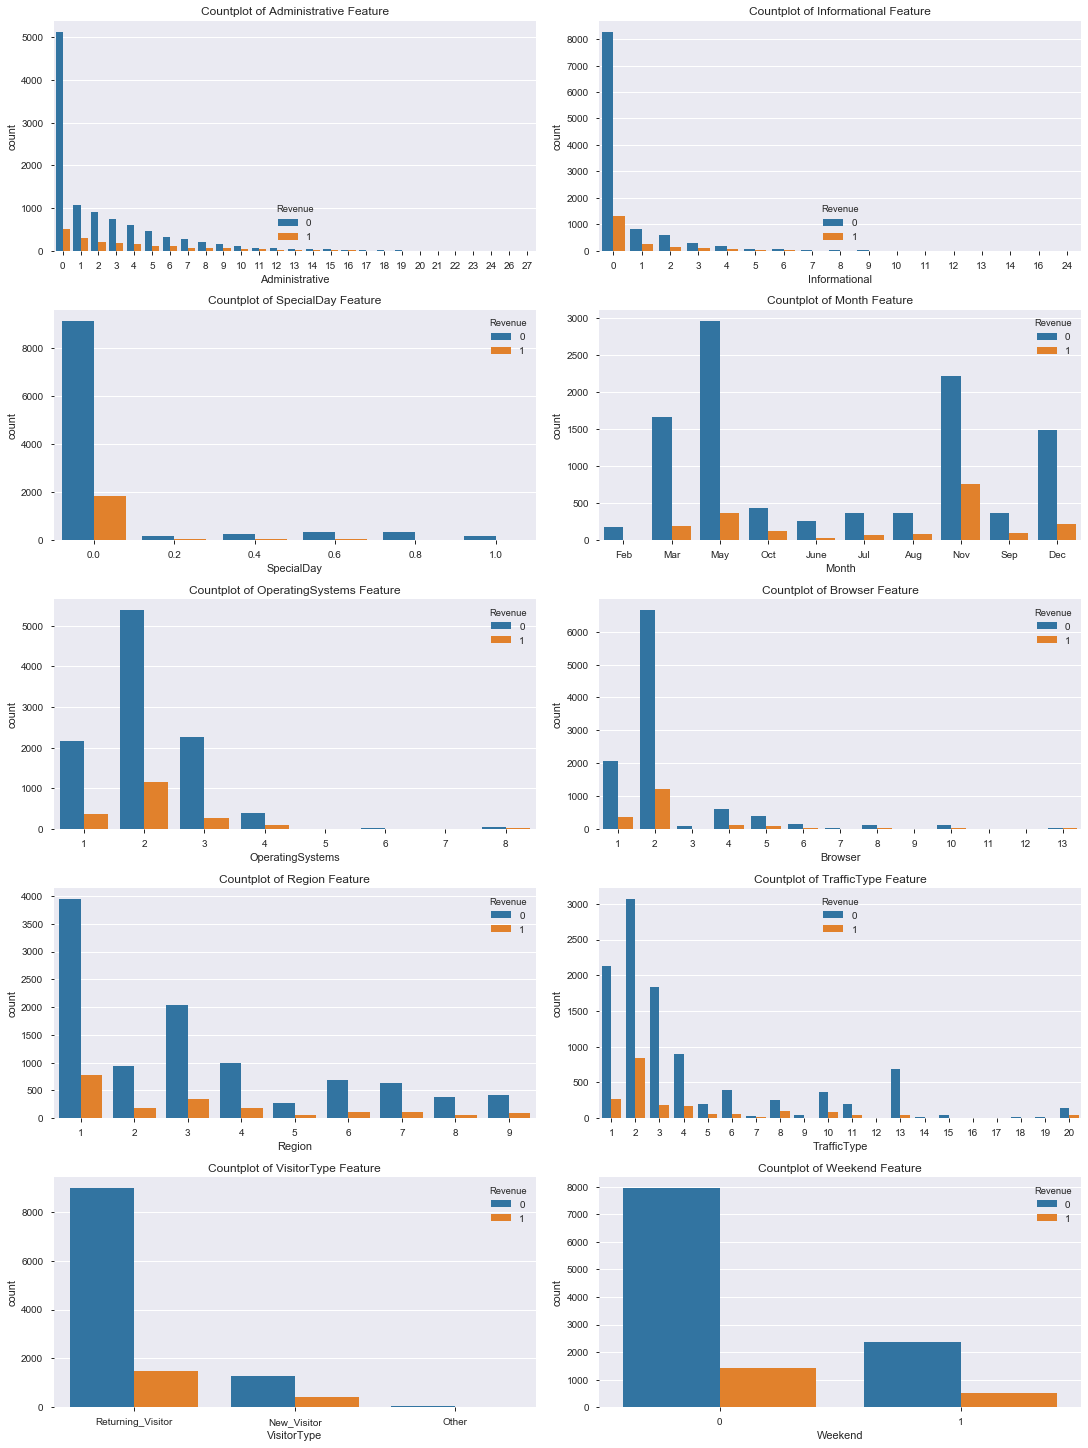

In [25]:
figs, axes = plt.subplots(5,2, figsize=(15,20), constrained_layout=True)
for col, ax in zip(cat_columns[:-1], axes.flat):
    sns.countplot(df[col], hue=df['Revenue'], ax=ax)
    ax.set_title("Countplot of {} Feature".format(col))
plt.show()

#### What is the fraction of Special Day every month?

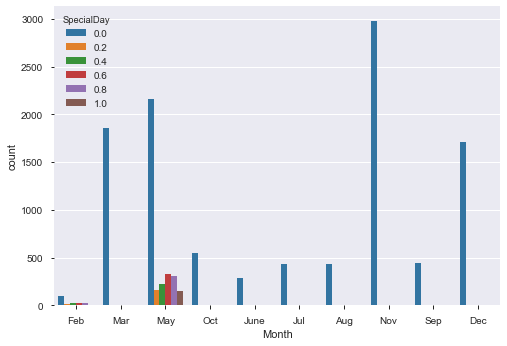

Month  SpecialDay
Aug    0.0           1.000000
Dec    0.0           1.000000
Feb    0.0           0.563536
       0.4           0.116022
       0.6           0.104972
       0.8           0.104972
       0.2           0.082873
       1.0           0.027624
Jul    0.0           1.000000
June   0.0           1.000000
Mar    0.0           1.000000
May    0.0           0.648543
       0.6           0.099429
       0.8           0.091619
       0.4           0.066687
       0.2           0.048964
       1.0           0.044758
Nov    0.0           1.000000
Oct    0.0           1.000000
Sep    0.0           1.000000
Name: SpecialDay, dtype: float64


In [26]:
sns.countplot(df['Month'], hue=df['SpecialDay'])
plt.show()
print(df.groupby('Month')['SpecialDay'].value_counts(normalize=True))

#### what is the proportion of users likely to make a transaction in our dataframe?

In [27]:
df['Revenue'].mean()

0.15632937320770177

#### What are average values of numerical features for users likely to make a transaction?

In [28]:
df[df['Revenue'] == 1].mean()

Administrative                3.393606
Administrative_Duration     119.483244
Informational                 0.786164
Informational_Duration       57.611427
ProductRelated               48.210168
ProductRelated_Duration    1876.209615
BounceRates                   0.005117
ExitRates                     0.019555
PageValues                   27.264518
SpecialDay                    0.023166
OperatingSystems              2.092767
Browser                       2.453354
Region                        3.082285
TrafficType                   4.021488
Weekend                       0.261530
Revenue                       1.000000
dtype: float64

Average time spent by user on Product is 1876.209615. 

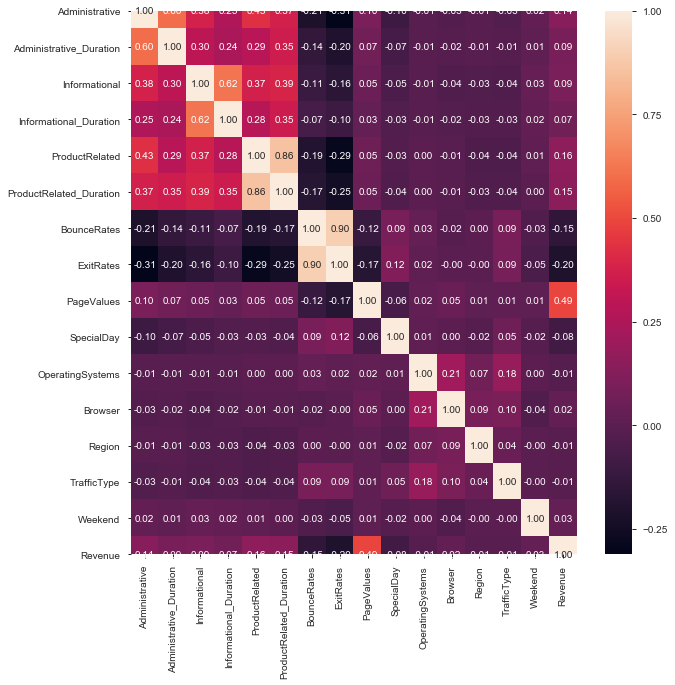

In [29]:
plt.figure(figsize=[10,10])
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f');

In [30]:
df2 = pd.get_dummies(df, drop_first=True)

In [31]:
X = df2.drop('Revenue', axis=1)
y = df2['Revenue']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
ss = StandardScaler()
x_train_scaled = pd.DataFrame(ss.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(ss.transform(x_test), columns=x_test.columns)

In [37]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)
y_pred = rfc.fit(x_train_scaled,y_train).predict(x_test_scaled)

In [38]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, cohen_kappa_score

In [39]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
print("Cohen Kappa Score:", cohen_kappa_score(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.9085199344620426
F1 Score: 0.6549948506694131
Cohen Kappa Score: 0.6032056129601107
Confusion Matrix: [[3009  107]
 [ 228  318]]
